In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Нажми сюда [датасет] [Iskan] 

[Iskan]: https://gist.github.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb

In [2]:
data = pd.read_csv('C:\\Users\\User\\Desktop\\weight-height.csv')

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data['Height'] = round(data['Height']*2.54, 3) # конвертируем рост из дюймов в см
data['Weight'] = round(data['Weight']/2.205, 3) # конвертируем вес из фунтов в кг 
data.columns=[ 'Пол', 'Рост, см','Вес, кг']

In [5]:
data.head()

,Пол,"Рост, см","Вес, кг"
0,Male,187.571,109.702
1,Male,174.706,73.610
2,Male,188.240,96.481
3,Male,182.197,99.793
4,Male,177.500,93.583


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Пол         10000 non-null object
Рост, см    10000 non-null float64
Вес, кг     10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


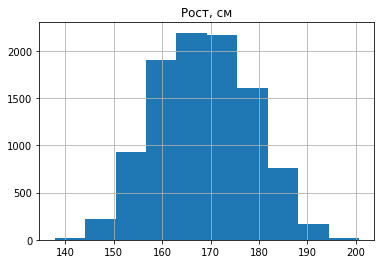

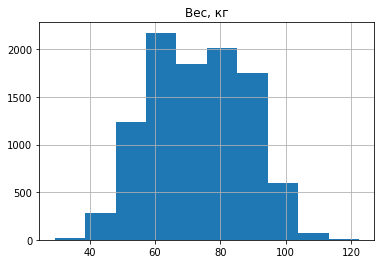

In [7]:
data.hist(column='Рост, см');
data.hist(column='Вес, кг');

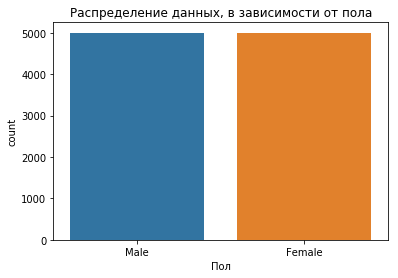

In [8]:
sns.countplot(data['Пол']);
plt.title('Распределение данных, в зависимости от пола');

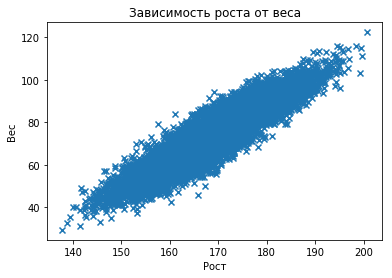

In [9]:
plt.scatter(np.array(data['Рост, см']), np.array(data['Вес, кг']),  marker='x');
plt.xlabel('Рост')
plt.ylabel('Вес')
plt.title('Зависимость роста от веса');

In [10]:
data.describe()

,"Рост, см","Вес, кг"
count,10000.000000,10000.000000
mean,168.573599,73.215582
std,9.772718,14.561649
min,137.828000,29.342000
25%,161.304250,61.595500
50%,168.447500,73.112000
75%,175.702750,84.883750
max,200.657000,122.444000


In [11]:
class LinearRegression:
    def fit(self, X, y):
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    def predict(self, X):
        return X.dot(self.w)

def shuffle_data(X, Y, seed=None):
    """ Случайное перемешивание X, Y """
    if seed: # для воспроизведения результатов
        np.random.seed(seed) 
    index = np.arange(X.shape[0]) # массив индексов
    np.random.shuffle(index) # shuffle() перемешивает данные( не надо присваивать переменной, он и так меняет index)
    return X[index], Y[index]

def train_test_split(X, Y, test_size=0.5, shuffle=True, seed=None):
    if shuffle:
        X, Y = shuffle_data(X, Y, seed)
    # Разделить данные в указанном соотношении ( на тестовые и тренировочные)
    split_i = len(Y) - int(len(Y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = Y[:split_i], Y[split_i:]

    return X_train, X_test, y_train, y_test

In [12]:
# Разделим наши данные, по признаку 'Пол'
data_women = data[data['Пол']=='Female'] 
data_man = data[data['Пол']=='Male']

In [13]:
df = data_man.drop(['Пол'], axis=1)
X = np.array(df['Рост, см']) #X.shape: (5000,)
Y = np.array(df['Вес, кг']) #Y.shape: (5000,)
n = X.shape[0] # 5000


x= np.concatenate( (np.ones((n, 1)), X.reshape((n, 1)) ), axis=1)
y = Y.reshape((n, 1))

X_train, X_test, y_train, y_test = train_test_split(x, y, 0.2, True, 24)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 2) (1000, 2) (4000, 1) (1000, 1)


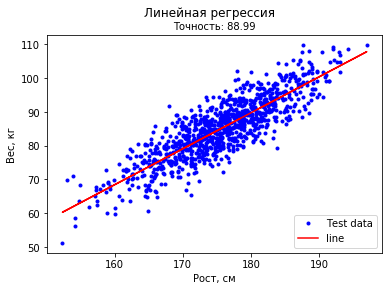

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predi = model.predict(X_test)

rmse = (np.mean((y_test - y_predi)**2))**1/2
accuracy = 100 - rmse

plt.suptitle("Линейная регрессия")
plt.title("Точность: %.2f" % accuracy, fontsize=10)
plt.plot(X_test[:,1], y_test, "b.") 
plt.plot(X_test[:, 1], y_predi, "r-") 
plt.xlabel('Рост, см')
plt.ylabel('Вес, кг')
plt.legend(("Test data", "line"), loc='lower right')
plt.show()

In [15]:
model.w # вектор весов

array([[-102.18536472],
       [   1.06639853]])

#### Линейная регрессия с помощью scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)

In [17]:
rmse = (np.mean((y_test - y_predicted)**2))**1/2
accuracy = 100 - rmse

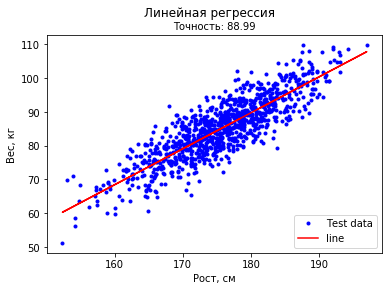

In [18]:
plt.suptitle("Линейная регрессия")
plt.title("Точность: %.2f" % accuracy, fontsize=10)
plt.plot(X_test[:,1], y_test, "b.") 
plt.plot(X_test[:, 1], y_predicted, "r-") 
plt.xlabel('Рост, см')
plt.ylabel('Вес, кг')
plt.legend(("Test data", "line"), loc='lower right')
plt.show()

#### Пояснения и вывод нормального уравнения

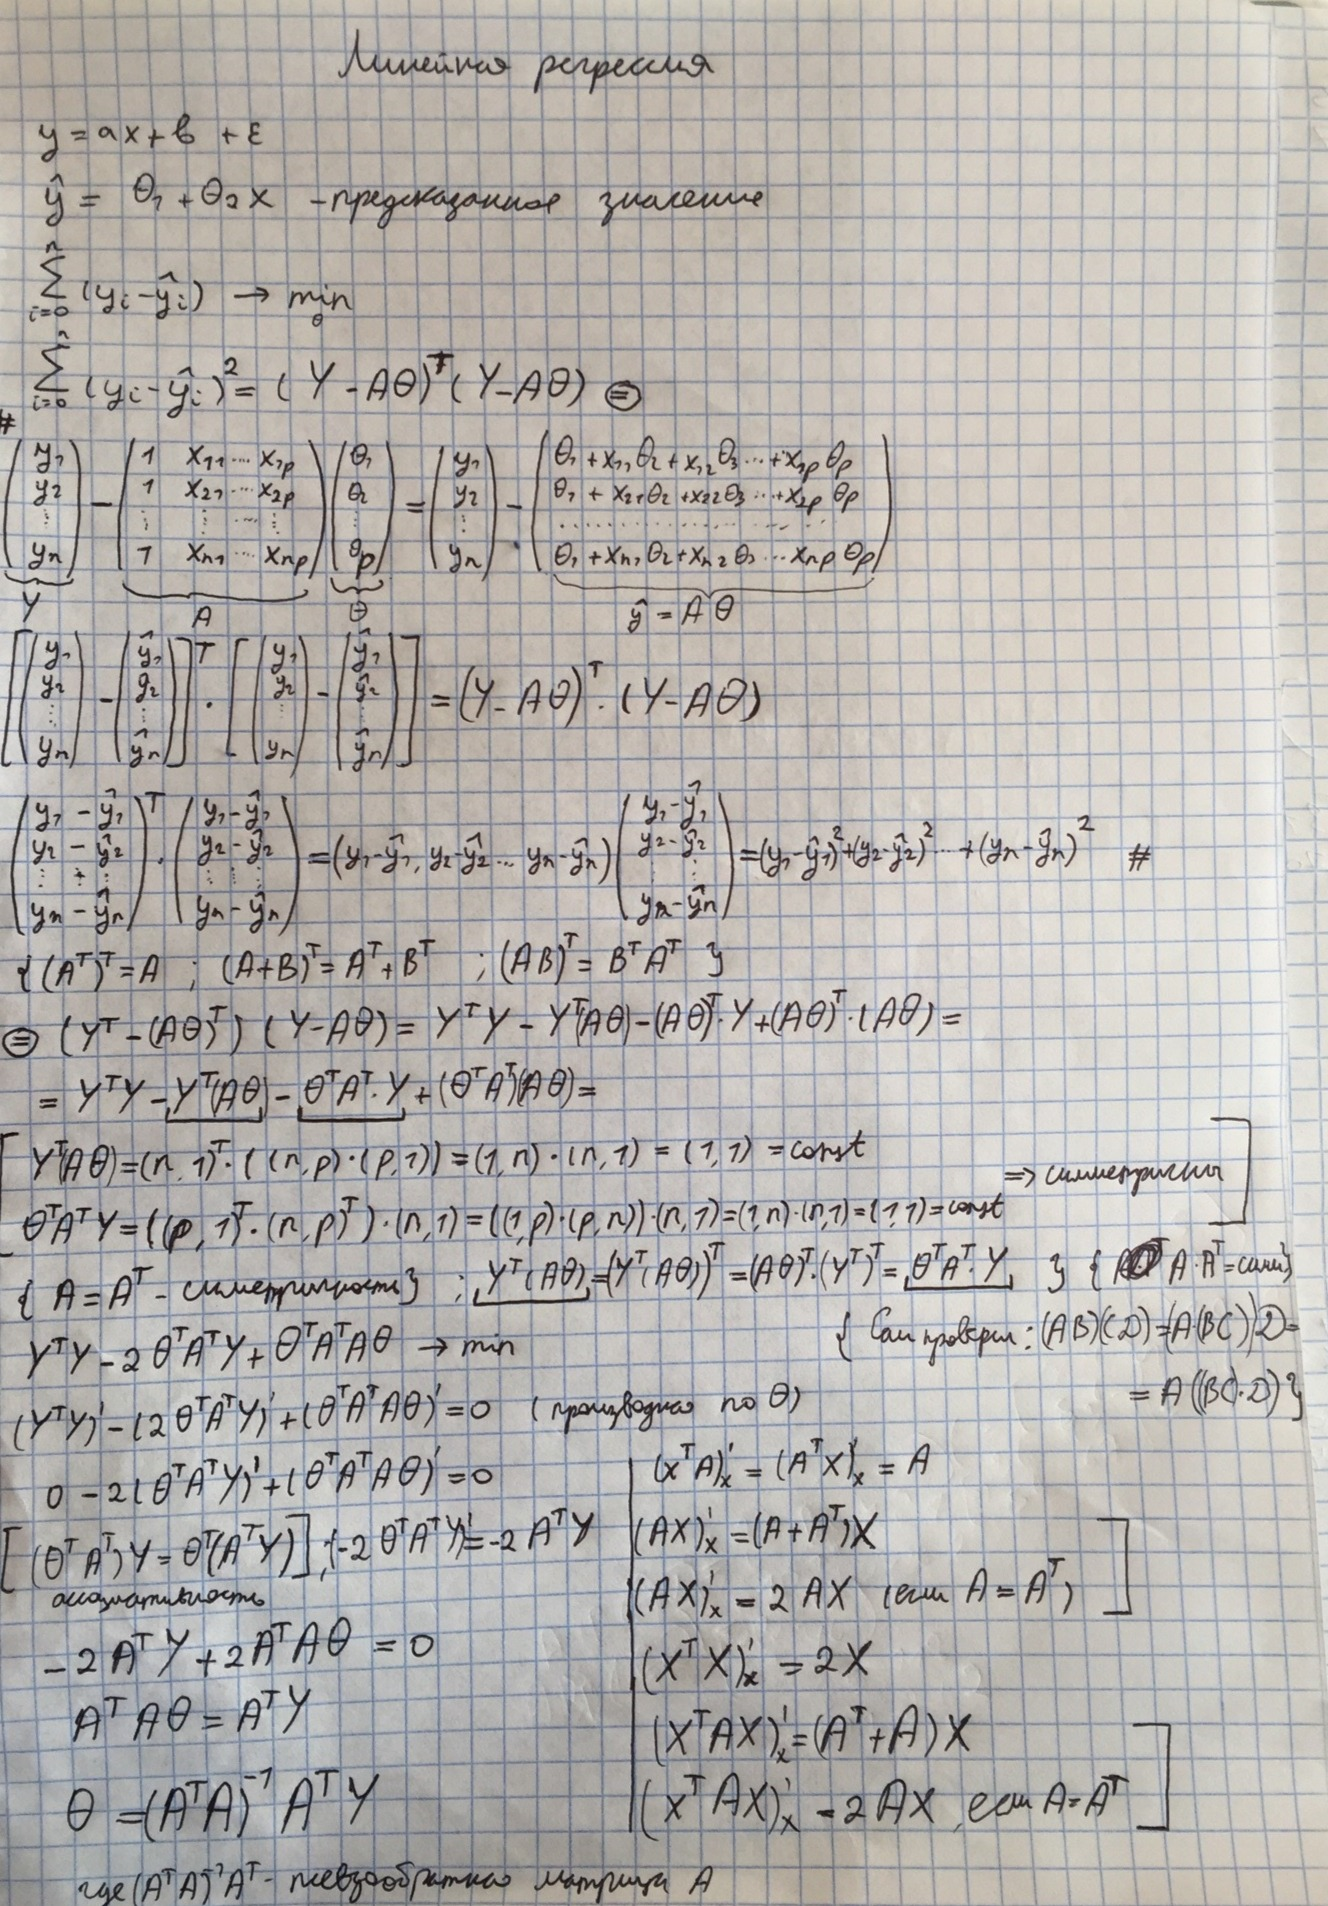